# **Nicholas Saunders**

**Astronomy 425: Cosmology**  
**Homework 5**

In [1]:
import matplotlib.pyplot as pl
import numpy as np
from scipy.integrate import odeint
import astropy.units as u

%matplotlib inline

In [2]:
H0 = 70 * u.km / u.second / u.megaparsec # hubble constant in km/s/Mpc
H0Gyr = H0.to(1/u.gigayear).value  # hubble constant in Gyr^-1
c = 3e8  # speed of light in m/s

**Problem 1**

Starting with the Friedmann Equation:

$$\frac{H(t)^2}{H_0^2} = \Omega_{r,0} a^{-4} + \Omega_{m,0} a^{-3} + \Omega_{\Lambda,0} + (1 - \Omega_0)a^{-2} $$

we can make the substitution $H(t)=\frac{\dot{a}}{a}$, and solve for $\dot{a}$ to get

$$\dot{a}=H_0a \sqrt{\Omega_{r,0}a^{-4}+\Omega_{m,0}a^{-3}+\Omega_{\Lambda,0}+(1-\Omega_0)a^{-2}}.$$

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:11: RuntimeWarning: invalid value encountered in sqrt


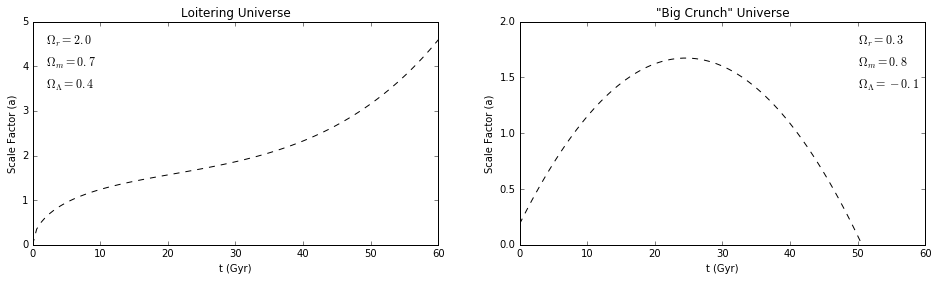

In [3]:
fig, ax = pl.subplots(1,2)
fig.set_size_inches(16, 4);

args1 = .3 , 7., 0.
args2 = 2., .7, 0.4
args3 = 0.3, 0.8, -0.1

def adot(a,t,Or,Om,OL):
    Oo = Or + Om + OL
    try:
        return H0Gyr* a * np.sqrt(Or * a**(-4.) + Om * a**(-3.) + OL + (1. - Oo)*a**(-2.))
    except:
        return np.nan

a0 = 1.e-10 # nonzero value very close to zero
t = np.linspace(0,60,100)

a_num1 = odeint(adot,a0,t,args=args1)
a_num2 = odeint(adot,a0,t,args=args2)
a_num3 = odeint(adot,a0,t,args=args3)
a_num3a = [a[0] for a in a_num3]

# create fit to continue plot of "Big Crunch" universe
z = np.polyfit(t[:35], a_num3a[:35], 2)
f = np.poly1d(z)
result = f(t)

# plot results
ax[0].plot(t,a_num2,'k--');
ax[0].set_title('Loitering Universe');
ax[0].set_xlabel('t (Gyr)');
ax[0].set_ylabel('Scale Factor (a)');
ax[0].text(2.,4.5,'$\\Omega_{r} = 2.0$',fontsize=12)
ax[0].text(2.,4.,'$\\Omega_{m} = 0.7$',fontsize=12)
ax[0].text(2.,3.5,'$\\Omega_{\\Lambda} = 0.4$',fontsize=12)

ax[1].plot(t,result,'k--');
ax[1].set_xlabel('t (Gyr)');
ax[1].set_ylabel('Scale Factor (a)');
ax[1].set_ylim(0,2);
ax[1].set_title('"Big Crunch" Universe');
ax[1].text(50.,1.8,'$\\Omega_{r} = 0.3$',fontsize=12);
ax[1].text(50.,1.6,'$\\Omega_{m} = 0.8$',fontsize=12);
ax[1].text(50.,1.4,'$\\Omega_{\\Lambda} = -0.1$',fontsize=12);

**Problem 2**

Starting with the equation for the density of an isothermal sphere, given by

$$\rho(r)=\frac{\sigma_v^2}{2\pi Gr^2}$$,

we can find the mass within the sphere by integrating the density over the volume.

$$M = \int_0^{\theta_E} \rho(r)dr = \int_0^{\pi} \int_0^{2\pi} \int_0^{\theta_E} \frac{\sigma_v^2}{2\pi Gr^2} r^2 sin(\theta) dr d\phi d\theta = \frac{\theta_E \sigma_v^2}{\pi G} \int_0^{2\pi} \phi d\phi = \frac{2\sigma_v^2 \theta_E}{G}$$

This value for M can be plugged into the definition of $\theta_E$:

$$\theta_E = \left( \frac{4GM}{c^2} \frac{D_{LS}}{D_L D_S}\right) ^{1/2} \rightarrow \theta_E = \left( \frac{4G\left( \frac{2\sigma_v^2 \theta_E}{G} \right) }{c^2} \frac{D_{LS}}{D_L D_S} \right)^{1/2}$$

$$ \theta_E^2 =  \theta_E \frac{8\sigma_v^2}{c^2} \frac{D_{LS}}{D_L D_S} \rightarrow \theta_E = \frac{8\sigma_v^2}{c^2} \frac{D_{LS}}{D_L D_S}$$

Solving for $\sigma_v^2$ yields

$$ \sigma_v^2 = \frac{\theta_E c^2 D_L D_S}{D_{LS}}$$,

and assuming $\theta = \frac{\theta_E}{D_L}$,

$$\sigma_v^2 = \frac{\theta c^2 D_S}{8 D_{LS}} = \frac{c^2}{8} \left( \frac{\theta D_S}{D_{LS}} \right) \rightarrow \sigma_v = \frac{c}{2\sqrt{2}} \left( \frac{\theta D_S}{D_{LS}} \right)^{1/2}.$$

After some unit conversion, we're left with our result,

$$\sigma_v \approx 10^3 kms^{-1}\left( \frac{\theta}{28"} \frac{D_S}{D_{LS}} \right)^{1/2}.$$